In [1]:
import random
import numpy as np
import torch

seed = 2022

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

## Load Data

In [2]:
import pandas as pd

df_args = pd.read_csv('../../../Data/arguments-training.tsv',sep = '\t')
df_lbls = pd.read_table('../../../Data/labels-training.tsv')
data_raw = df_args.merge(df_lbls, how="left", on="Argument ID")

## Simple Details

In [3]:
print("Number of rows in data =", data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 5220
Number of columns in data = 24


**Sample data:**


,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01004,We should ban naturopathy,against,it provides a useful income for some people,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

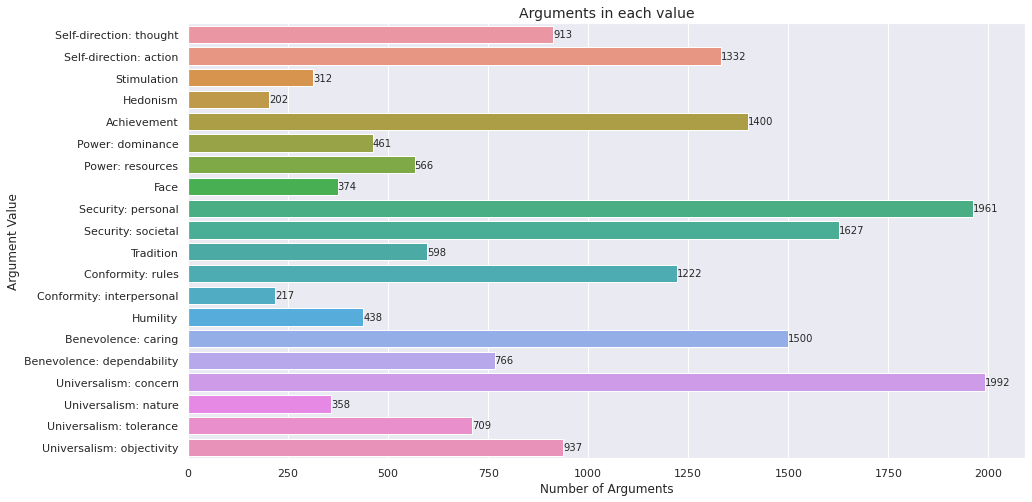

In [5]:
categories = list(data_raw.columns.values[4:])

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax = sns.barplot(y=categories, x=data_raw.iloc[:,4:].sum().values)
ax.bar_label(ax.containers[0])
plt.title("Arguments in each value", fontsize=14)
plt.xlabel('Number of Arguments', fontsize=12)
plt.ylabel('Argument Value', fontsize=12)

plt.show()

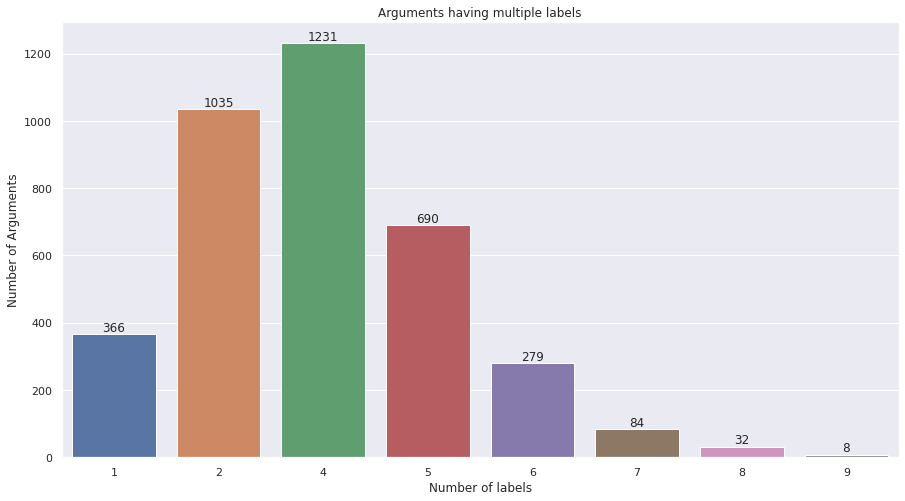

In [6]:
rowSums = data_raw.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
ax.bar_label(ax.containers[0])
plt.title("Arguments having multiple labels")
plt.ylabel('Number of Arguments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)
plt.show()